Epoch 1/100


/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/keras/src/layers/rnn/rnn.py:205: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


30/30 ━━━━━━━━━━━━━━━━━━━━ 5s 97ms/step - loss: 0.0206
Epoch 2/100
30/30 ━━━━━━━━━━━━━━━━━━━━ 2s 78ms/step - loss: 5.7553e-04
Epoch 3/100
30/30 ━━━━━━━━━━━━━━━━━━━━ 2s 68ms/step - loss: 1.6851e-04
Epoch 4/100
30/30 ━━━━━━━━━━━━━━━━━━━━ 3s 94ms/step - loss: 1.4058e-04
Epoch 5/100
30/30 ━━━━━━━━━━━━━━━━━━━━ 2s 80ms/step - loss: 1.4358e-04
Epoch 6/100
30/30 ━━━━━━━━━━━━━━━━━━━━ 2s 69ms/step - loss: 1.3428e-04
Epoch 7/100
30/30 ━━━━━━━━━━━━━━━━━━━━ 2s 59ms/step - loss: 1.5260e-04
Epoch 8/100
30/30 ━━━━━━━━━━━━━━━━━━━━ 2s 58ms/step - loss: 1.4447e-04
Epoch 9/100
30/30 ━━━━━━━━━━━━━━━━━━━━ 2s 57ms/step - loss: 1.2700e-04
Epoch 10/100
30/30 ━━━━━━━━━━━━━━━━━━━━ 2s 58ms/step - loss: 1.3838e-04
Epoch 11/100
30/30 ━━━━━━━━━━━━━━━━━━━━ 2s 61ms/step - loss: 1.3379e-04
Epoch 12/100
30/30 ━━━━━━━━━━━━━━━━━━━━ 2s 59ms/step - loss: 1.4049e-04
Epoch 13/100
30/30 ━━━━━━━━━━━━━━━━━━━━ 2s 59ms/step - loss: 1.3294e-04
Epoch 14/100
30/30 ━━━━━━━━━━━━━━━━━━━━ 2s 57ms/step - loss: 1.2477e-04
Epoch 15/100
30/3

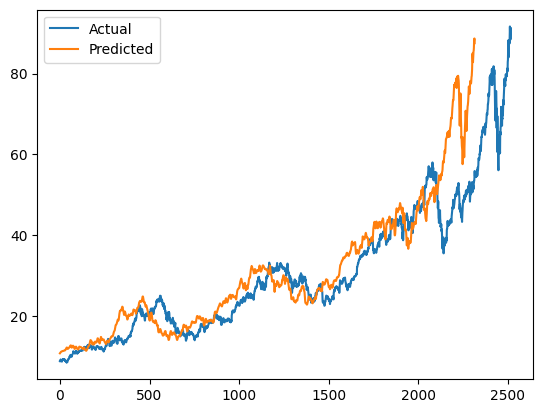

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense

# Load the dataset
data = pd.read_csv('/Users/sharveshs/Downloads/drive-download-20240328T132007Z-001/DATA.csv')

# Selecting only the 'Close' column for simplicity
close_price = data['Close'].values.reshape(-1,1)

# Normalize the data
scaler = MinMaxScaler(feature_range=(0, 1))
close_price_normalized = scaler.fit_transform(close_price)

# Splitting the data into training and testing sets
train_size = int(len(close_price_normalized) * 0.80)
test_size = len(close_price_normalized) - train_size
train_data, test_data = close_price_normalized[0:train_size,:], close_price_normalized[train_size:len(close_price_normalized),:]

# Convert an array of values into a dataset matrix
def create_dataset(dataset, time_step=1):
    dataX, dataY = [], []
    for i in range(len(dataset) - time_step - 1):
        a = dataset[i:(i + time_step), 0]
        dataX.append(a)
        dataY.append(dataset[i + time_step, 0])
    return np.array(dataX), np.array(dataY)

# Reshape into X=t and Y=t+1
time_step = 100
X_train, y_train = create_dataset(train_data, time_step)
X_test, y_test = create_dataset(test_data, time_step)

# Reshape input to be [samples, time steps, features]
X_train = X_train.reshape(X_train.shape[0], X_train.shape[1], 1)
X_test = X_test.reshape(X_test.shape[0], X_test.shape[1], 1)

# Build the LSTM model
model = Sequential()
model.add(LSTM(units=50, return_sequences=True, input_shape=(time_step, 1)))
model.add(LSTM(units=50))
model.add(Dense(units=1))
model.compile(optimizer='adam', loss='mean_squared_error')


# Train the model
model.fit(X_train, y_train, epochs=100, batch_size=64)


# Predictions
train_predict = model.predict(X_train)
test_predict = model.predict(X_test)

# Transform back to original form
train_predict = scaler.inverse_transform(train_predict)
test_predict = scaler.inverse_transform(test_predict)
y_train = scaler.inverse_transform([y_train])
y_test = scaler.inverse_transform([y_test])

# Plotting
plt.plot(data['Close'], label='Actual')
plt.plot(np.concatenate((train_predict, test_predict)), label='Predicted')
plt.legend()
plt.show()


In [2]:
from sklearn.metrics import mean_squared_error

# Calculate RMSE
rmse = np.sqrt(mean_squared_error(np.concatenate(y_test), np.concatenate(test_predict)))
print('Root Mean Squared Error (RMSE):', rmse)


Root Mean Squared Error (RMSE): 1.9929060583451483


Epoch 1/100


/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/keras/src/layers/rnn/rnn.py:205: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


26/26 ━━━━━━━━━━━━━━━━━━━━ 3s 55ms/step - loss: 0.0128
Epoch 2/100
26/26 ━━━━━━━━━━━━━━━━━━━━ 1s 45ms/step - loss: 7.0145e-04
Epoch 3/100
26/26 ━━━━━━━━━━━━━━━━━━━━ 1s 43ms/step - loss: 1.2743e-04
Epoch 4/100
26/26 ━━━━━━━━━━━━━━━━━━━━ 1s 43ms/step - loss: 1.1166e-04
Epoch 5/100
26/26 ━━━━━━━━━━━━━━━━━━━━ 2s 67ms/step - loss: 1.0936e-04
Epoch 6/100
26/26 ━━━━━━━━━━━━━━━━━━━━ 2s 60ms/step - loss: 1.0302e-04
Epoch 7/100
26/26 ━━━━━━━━━━━━━━━━━━━━ 1s 44ms/step - loss: 9.8762e-05
Epoch 8/100
26/26 ━━━━━━━━━━━━━━━━━━━━ 1s 46ms/step - loss: 9.9880e-05
Epoch 9/100
26/26 ━━━━━━━━━━━━━━━━━━━━ 1s 45ms/step - loss: 1.0039e-04
Epoch 10/100
26/26 ━━━━━━━━━━━━━━━━━━━━ 2s 57ms/step - loss: 9.8868e-05
Epoch 11/100
26/26 ━━━━━━━━━━━━━━━━━━━━ 1s 51ms/step - loss: 9.0818e-05
Epoch 12/100
26/26 ━━━━━━━━━━━━━━━━━━━━ 1s 49ms/step - loss: 1.0006e-04
Epoch 13/100
26/26 ━━━━━━━━━━━━━━━━━━━━ 1s 52ms/step - loss: 9.6342e-05
Epoch 14/100
26/26 ━━━━━━━━━━━━━━━━━━━━ 1s 50ms/step - loss: 8.7937e-05
Epoch 15/100
26/2

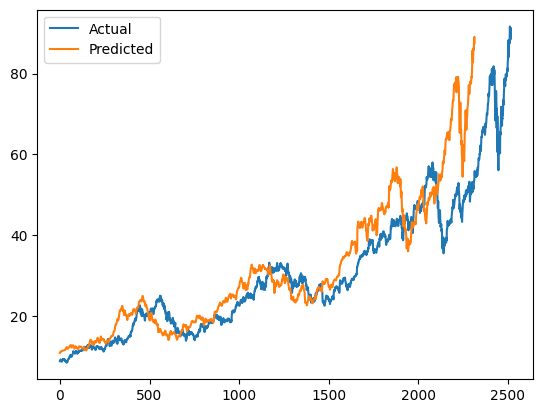

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense

# Load the dataset
data = pd.read_csv('/Users/sharveshs/Downloads/drive-download-20240328T132007Z-001/DATA.csv')

# Selecting only the 'Close' column for simplicity
close_price = data['Close'].values.reshape(-1,1)

# Normalize the data
scaler = MinMaxScaler(feature_range=(0, 1))
close_price_normalized = scaler.fit_transform(close_price)

# Splitting the data into training and testing sets
train_size = int(len(close_price_normalized) * 0.70)
test_size = len(close_price_normalized) - train_size
train_data, test_data = close_price_normalized[0:train_size,:], close_price_normalized[train_size:len(close_price_normalized),:]

# Convert an array of values into a dataset matrix
def create_dataset(dataset, time_step=1):
    dataX, dataY = [], []
    for i in range(len(dataset) - time_step - 1):
        a = dataset[i:(i + time_step), 0]
        dataX.append(a)
        dataY.append(dataset[i + time_step, 0])
    return np.array(dataX), np.array(dataY)

# Reshape into X=t and Y=t+1
time_step = 100
X_train, y_train = create_dataset(train_data, time_step)
X_test, y_test = create_dataset(test_data, time_step)

# Reshape input to be [samples, time steps, features]
X_train = X_train.reshape(X_train.shape[0], X_train.shape[1], 1)
X_test = X_test.reshape(X_test.shape[0], X_test.shape[1], 1)

# Build the LSTM model
model = Sequential()
model.add(LSTM(units=50, return_sequences=True, input_shape=(time_step, 1)))
model.add(LSTM(units=50))
model.add(Dense(units=1))
model.compile(optimizer='adam', loss='mean_squared_error')


# Train the model
model.fit(X_train, y_train, epochs=100, batch_size=64)


# Predictions
train_predict = model.predict(X_train)
test_predict = model.predict(X_test)

# Transform back to original form
train_predict = scaler.inverse_transform(train_predict)
test_predict = scaler.inverse_transform(test_predict)
y_train = scaler.inverse_transform([y_train])
y_test = scaler.inverse_transform([y_test])

# Plotting
plt.plot(data['Close'], label='Actual')
plt.plot(np.concatenate((train_predict, test_predict)), label='Predicted')
plt.legend()
plt.show()


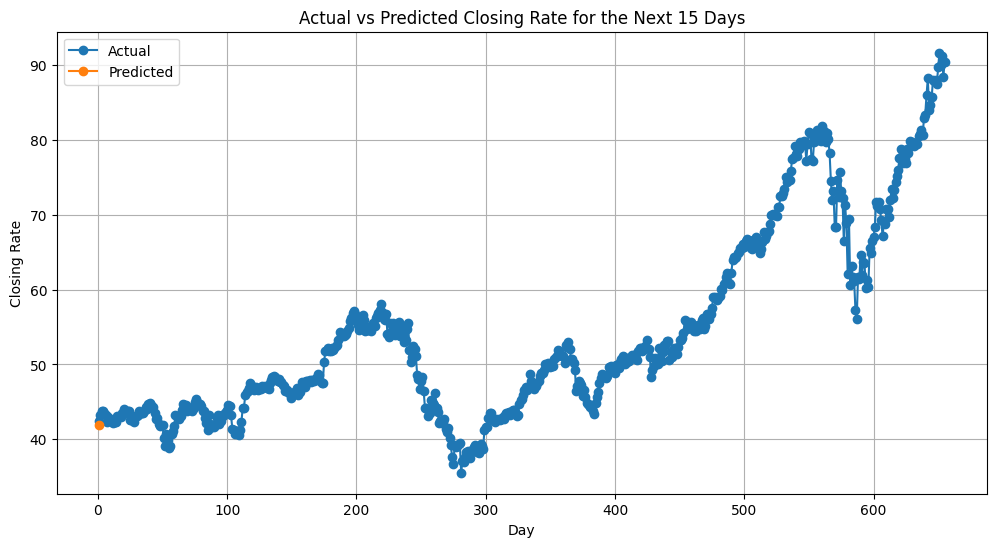

In [4]:
# Plotting
plt.figure(figsize=(12, 6))
plt.plot(np.arange(1, len(y_test[0]) + 1), y_test[0], label='Actual', marker='o')
plt.plot(np.arange(1, len(test_predict[0]) + 1), test_predict[0], label='Predicted', marker='o')
plt.xlabel('Day')
plt.ylabel('Closing Rate')
plt.title('Actual vs Predicted Closing Rate for the Next 15 Days')
plt.legend()
plt.grid(True)
plt.show()



In [5]:
from sklearn.metrics import mean_squared_error

# Calculate RMSE
rmse = np.sqrt(mean_squared_error(np.concatenate(y_test), np.concatenate(test_predict)))
print('Root Mean Squared Error (RMSE):', rmse)


Root Mean Squared Error (RMSE): 1.7339657434789013


In [6]:
from sklearn.metrics import r2_score

# Calculate R2 score
r2 = r2_score(np.concatenate(y_test), np.concatenate(test_predict))
print('R-squared (R2) Score:', r2)



R-squared (R2) Score: 0.9813536844573014


In [7]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Transform back to original form for y_train and y_test
y_train = scaler.inverse_transform(y_train.reshape(-1, 1)).flatten()
y_test = scaler.inverse_transform(y_test.reshape(-1, 1)).flatten()

# Transform predictions back to original form
train_predict = train_predict.flatten()
test_predict = test_predict.flatten()

# Compute metrics
train_mae = mean_absolute_error(y_train, train_predict)
test_mae = mean_absolute_error(y_test, test_predict)

train_mse = mean_squared_error(y_train, train_predict)
test_mse = mean_squared_error(y_test, test_predict)

train_rmse = np.sqrt(train_mse)
test_rmse = np.sqrt(test_mse)

train_r2 = r2_score(y_train, train_predict)
test_r2 = r2_score(y_test, test_predict)

print("Train MAE:", train_mae)
print("Test MAE:", test_mae)
print("Train MSE:", train_mse)
print("Test MSE:", test_mse)
print("Train RMSE:", train_rmse)
print("Test RMSE:", test_rmse)
print("Train R-squared:", train_r2)
print("Test R-squared:", test_r2)


Train MAE: 1848.7038120822847
Test MAE: 4462.12143516565
Train MSE: 3740079.021852201
Test MSE: 20997771.678145975
Train RMSE: 1933.9283910869608
Test RMSE: 4582.332558658961
Train R-squared: -10.328311890485125
Test R-squared: -17.87400283285801


In [8]:
# Compute Mean Absolute Percentage Error (MAPE)
def mean_absolute_percentage_error(y_true, y_pred):
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

train_mape = mean_absolute_percentage_error(y_train, train_predict)
test_mape = mean_absolute_percentage_error(y_test, test_predict)

print("Train MAPE:", train_mape, "%")
print("Test MAPE:", test_mape, "%")


Train MAPE: 98.8073434397155 %
Test MAPE: 98.81955966314975 %
